In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import ensemble, linear_model, metrics, model_selection, pipeline, preprocessing, svm, tree

In [67]:
%matplotlib inline

In [2]:
training_df = pd.read_csv("../data/digit-recognizer/train.csv")
testing_df = pd.read_csv("../data/digit-recognizer/test.csv")

In [3]:
preprocessing_pipeline = pipeline.Pipeline(
    steps=[("min_max_scaler", preprocessing.MinMaxScaler())],
    verbose=True
)

In [4]:
X = training_df.drop("label", axis=1)
y = training_df.loc[:, "label"]
Z = preprocessing_pipeline.fit_transform(X)

[Pipeline] .... (step 1 of 1) Processing min_max_scaler, total=   0.3s


In [5]:
_random_state = np.random.RandomState(42)
logistic_regression = linear_model.LogisticRegression(max_iter=1e3, multi_class="multinomial", penalty="l2", solver="sag", random_state=_random_state)
logistic_regression_scores = model_selection.cross_val_score(_classifier, Z, y, cv=5, n_jobs=5)

In [6]:
logistic_regression_scores.mean()

0.9183336285512185

In [16]:
_random_state = np.random.RandomState(42)
svc = svm.SVC(gamma="scale", probability=True, random_state=_random_state)
svc_scores = model_selection.cross_val_score(svc, Z, y, cv=5, n_jobs=5)

In [17]:
svc_scores.mean()

0.9755954947412935

In [18]:
_random_state = np.random.RandomState(42)
decision_tree = tree.DecisionTreeClassifier(random_state=_random_state)
decision_tree_scores = model_selection.cross_val_score(decision_tree, Z, y, cv=5, n_jobs=5)

In [19]:
decision_tree_scores.mean()

0.85445227421564

# Voting Classifiers

In [20]:
_estimators = [
    ("logistic_regression", logistic_regression),
    ("support_vector_classifier", svc),
    ("decision_tree_classifier", decision_tree)
]
_n_jobs = len(_estimators)
voting_classifier = ensemble.VotingClassifier(_estimators, voting="soft", n_jobs=_n_jobs)

In [21]:
voting_classifier_scores = model_selection.cross_val_score(voting_classifier, Z, y, cv=5, n_jobs=5)

In [22]:
voting_classifier_scores.mean()

0.9556670020218991

# Bagging and Pasting

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

In [39]:
# sampling training samples with replacement is called bagging
_random_state = np.random.RandomState(42)
bagging_classifier = ensemble.BaggingClassifier(base_estimator=decision_tree,
                                                n_estimators=100,
                                                bootstrap=True,
                                                oob_score= True,
                                                n_jobs=100,
                                                random_state=_random_state)

In [40]:
bagging_classifier.fit(Z, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=RandomState(MT19937) at 0x153A1FF3E780,
                                            

In [42]:
bagging_classifier.oob_score_

0.9446666666666667

In [36]:
# can use cross-validation to confirm that oob_score is a good measure of out-of-sample accuracy
bagging_scores = model_selection.cross_val_score(bagging_classifier, Z, y, cv=5, n_jobs=5)

In [37]:
bagging_scores.mean()

0.9474276609338137

In [30]:
# sampling training samples without replacement is called pasting
_random_state = np.random.RandomState(42)
pasting_classifier = ensemble.BaggingClassifier(base_estimator=decision_tree,
                                                n_estimators=100,
                                                bootstrap=False,
                                                n_jobs=100,
                                                random_state=_random_state)

In [31]:
pasting_scores = model_selection.cross_val_score(pasting_classifier, Z, y, cv=5, n_jobs=5)

In [34]:
# bagging is generally preferred to pasting
pasting_scores.mean()

0.8704999497076589

# Random Patches and Random Subspaces

In [43]:
_random_state = np.random.RandomState(42)
random_patches_classifier = ensemble.BaggingClassifier(base_estimator=decision_tree,
                                                       n_estimators=100,
                                                       bootstrap=True,
                                                       bootstrap_features=True,
                                                       oob_score=True,
                                                       n_jobs=100,
                                                       random_state=_random_state)

In [44]:
random_patches_classifier.fit(Z, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=RandomState(MT19937) at 0x153A1FF3E780,
                                            

In [45]:
random_patches_classifier.oob_score_

0.9570952380952381

In [47]:
_random_state = np.random.RandomState(42)
random_subspaces_classifier = ensemble.BaggingClassifier(base_estimator=decision_tree,
                                                         n_estimators=100,
                                                         bootstrap=False,
                                                         max_samples=1.0,
                                                         bootstrap_features=True,
                                                         max_features=1.0, # could also be less than 1!
                                                         n_jobs=100,
                                                         random_state=_random_state)

In [49]:
random_subspaces_scores = model_selection.cross_val_score(random_subspaces_classifier, Z, y, cv=5, n_jobs=5)

In [50]:
random_subspaces_scores.mean()

0.9598096473985512

# Random Forests

In [53]:
_random_state = np.random.RandomState(42)
random_forest_classifier = ensemble.RandomForestClassifier(n_estimators=100,
                                                           boostrap=True,
                                                           random_state=_random_state,
                                                           oob_score=True,
                                                           n_jobs=100)

In [54]:
random_forest_classifier.fit(Z, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=100, oob_score=True,
                       random_state=RandomState(MT19937) at 0x153A1FF3ECA8,
                       verbose=0, warm_start=False)

In [55]:
random_forest_classifier.oob_score_

0.9618571428571429

## Feature Importances

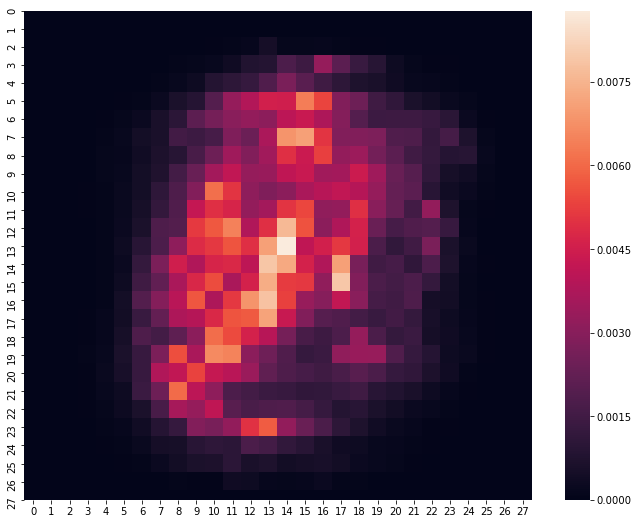

In [69]:
_importances = (random_forest_classifier.feature_importances_
                                        .reshape(28, 28))
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(_importances, square=True, ax=ax);

## Extra Trees

In [59]:
_random_state = np.random.RandomState(42)
extra_trees_classifier = ensemble.ExtraTreesClassifier(bootstrap=True,
                                                       n_estimators=100,
                                                       oob_score=True,
                                                       n_jobs=100,
                                                       random_state=_random_state)

In [60]:
extra_trees_classifier.fit(Z, y)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=100,
                     oob_score=True,
                     random_state=RandomState(MT19937) at 0x153A1309C258,
                     verbose=0, warm_start=False)

In [61]:
extra_trees_classifier.oob_score_

0.9614285714285714

# Boosting

## AdaBoost

In [70]:
ensemble.AdaBoostClassifier?

Init signature:
ensemble.AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

Parameters
----------
base_estimator : object, optional (default=None)
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is ``DecisionTreeClassifier(max_depth=1)``

n_estimators : integer, optional (d

In [83]:
_random_state = np.random.RandomState(42)
_base_estimator = tree.DecisionTreeClassifier(max_depth=1, random_state=_random_state)

# If AdaBoost ensemble is overfitting the training set, try reducing the n_estimators or more strongly regularizing the base estimator.
ada_boost_classifier = ensemble.AdaBoostClassifier(base_estimator=_base_estimator,
                                                   n_estimators=100,
                                                   learning_rate=1.0,
                                                   random_state=_random_state)

In [84]:
ada_boost_scores = model_selection.cross_val_score(ada_boost_classifier, Z, y, cv=5, n_jobs=5, verbose=10)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.7min
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:  1.1min remaining:   44.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  1.1min finished


In [85]:
ada_boost_scores.mean()

0.7234065452135664

## Gradient Boosting

Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

In [87]:
ensemble.GradientBoostingClassifier?

Init signature:
ensemble.GradientBoostingClassifier(
    loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
)
Docstring:     
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradie

In [88]:
_random_state = np.random.RandomState(42)
gradient_boosting_classifier = ensemble.GradientBoostingClassifier(n_estimators=100,
                                                                   learning_rate=1e-1,
                                                                   random_state=_random_state)

In [89]:
gradient_boosting_scores = model_selection.cross_val_score(gradient_boosting_classifier, Z, y, cv=5, n_jobs=5, verbose=10)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 22.8min remaining: 34.3min
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed: 22.9min remaining: 15.2min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 23.4min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 23.4min finished


In [90]:
gradient_boosting_scores.mean()

0.9424530571327285

In [99]:
def early_stopping(gbt, X, y, max_estimators=100, valid_size=0.1):    
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=valid_size) 
    current_valid_error = float("inf")
    error_going_up = 0
    valid_errors = []
    for n_estimators in range(1, max_estimators):
        if error_going_up == 5:
                break  # early stopping
        
        gbt.n_estimators = n_estimators
        gbt.fit(X_train, y_train)
        y_pred = gbt.predict(X_valid)
        valid_error = metrics.mean_squared_error(y_valid, y_pred)
        valid_errors.append(valid_error)
        if valid_error < current_valid_error:
            current_valid_error = valid_error
            error_going_up = 0
        else:
            error_going_up += 1
    return gbt, valid_errors

In [100]:
gradient_boosting_classifier = ensemble.GradientBoostingClassifier(learning_rate=1e-1,
                                                                   random_state=_random_state,
                                                                   warm_start=True)
_, valid_errors = early_stopping(gradient_boosting_classifier, Z, y)

Text(0, 0.5, 'Validation RMSE')

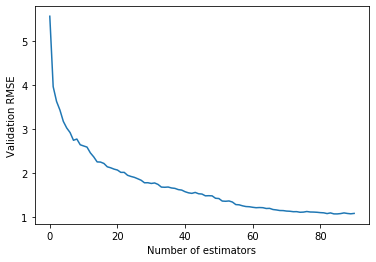

In [103]:
_ = plt.plot(valid_errors)
_ = plt.xlabel("Number of estimators")
_ = plt.ylabel("Validation RMSE")

In [104]:
# also possible to subsample the training data
_random_state = np.random.RandomState(42)
stochastic_gradient_boosting_classifier = ensemble.GradientBoostingClassifier(n_estimators=100,
                                                                              learning_rate=1e-1,
                                                                              random_state=_random_state,
                                                                              subsample=0.25)

In [105]:
stochastic_gradient_boosting_scores = model_selection.cross_val_score(stochastic_gradient_boosting_classifier, Z, y, cv=5, n_jobs=5, verbose=10)

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  9.2min remaining: 13.8min
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:  9.2min remaining:  6.1min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  9.4min finished


In [106]:
stochastic_gradient_boosting_scores.mean()

0.92433425849946

# Stacking

In [116]:
training_features, validation_features, training_target, validation_target = model_selection.train_test_split(Z, y, test_size=0.5)

estimators = [linear_model.LogisticRegression(multi_class="auto", solver="lbfgs"), tree.DecisionTreeClassifier(), svm.SVC(gamma="scale")]

for estimator in estimators:
    estimator.fit(training_features, training_target)
    
estimator_predictions = []
for estimator in estimators:
    estimator_predictions.append(estimator.predict(validation_features).reshape(-1, 1))


/home/pughdr/Research/kaust-vislab/scikit-learn-tutorials/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [117]:
_blending_features = np.hstack(estimator_predictions)
blending_features, validation_features, blending_target, meta_learning_target = model_selection.train_test_split(_blending_features, validation_target, test_size=0.5)

# shape of the blender features will be (?, len(estimators))
blenders = [ensemble.BaggingClassifier(), ensemble.AdaBoostClassifier()]
for blender in blenders:
    blender.fit(blending_features, blending_target)
    
blender_predictions = []
for blender in blenders:
    blender_predictions.append(blender.predict(validation_features).reshape(-1, 1))
    
meta_learning_features = np.hstack(blender_predictions)
meta_learner = ensemble.RandomForestClassifier(n_estimators=100)
meta_learner.fit(meta_learning_features, meta_learning_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)